# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

From a business standpoint, our objective is to discern the primary drivers influencing used car prices. Within the framework of the CRISP-DM methodology, our goal is to translate this business challenge into a data problem.

Our primary business goal is as follows: We aim to pinpoint the factors that contribute to a car's price, providing insights for our client (a used car dealership) on what aspects consumers value in a car.

From a data perspective, our approach involves scrutinizing the dataset to identify the variables or key features of a car that most significantly influence its price (our target variable).

This analysis encompasses both general statistical methods and the development of models to explore the correlation between these features and the ultimate price of the car. The process of data analysis and modeling is geared towards uncovering the features that exert the most substantial impact (positive and negative) on car prices.

Ultimately, we will select the most effective model that accurately predicts the price of each car based on the provided dataset.
  
The findings and the chosen model will be presented to the client, enabling them to review and refine their pricing strategy for both current and future inventory in alignment with customer expectations.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Below are the broad steps to understand the data and identify quality issues
Data Exploration:

Begin by loading the dataset and examining its structure and contents.
Identify the types of variables present (numeric, categorical) and their distributions.
Investigate the presence of missing values, outliers, or any nonsensical data entries.
Data Cleaning:

Address missing or nonsensical values by either imputing missing data or removing problematic entries.
Ensure consistency in data types across variables.
Data Preprocessing:

Encode non-numerical data using appropriate techniques (e.g., one-hot encoding for categorical variables).
Consider applying transformations like standardization, normalization, or log transformations to align data with mathematical assumptions and enhance model performance.
Exploratory Data Analysis (EDA):

Conduct a thorough review of the data by generating plots and graphs to reveal statistical properties.
Explore correlations between variables and distributions to identify potential relationships.
Adjust preprocessing steps based on insights gained during EDA.
Model Training:

Split the dataset into training and testing sets using cross-validation methods.
Train multiple models, iterating over different hyperparameters to find the optimal configuration for each model type.
Utilize cross-validation to assess model performance on various subsets of the data.
Model Evaluation:

Evaluate the performance of each model based on a chosen accuracy metric.
Select the best-performing model, typically the one with the lowest mean square error (MSE) or another relevant accuracy metric.
Validate that the chosen model generalizes well to new, unseen data.
Consider additional accuracy metrics depending on the specific models used.
Throughout this process, it's crucial to document the decisions made and the insights gained, ensuring a transparent and reproducible data analysis and modeling pipeline. Adjustments to the steps should be made based on the characteristics and nuances of the dataset.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

First import required library for data cleaning, Data Analysis and Modelling

In [94]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from  sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split,GridSearchCV,LeaveOneOut
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures ,OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.compose import make_column_transformer, make_column_selector
import seaborn as sns
from sklearn.inspection import permutation_importance


Load the Data using Pandas Read_CSV method

In [95]:
cars = pd.read_csv('./data/vehicles.csv')

use info() and head() method to understand the columns , data types and sample records

In [96]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [97]:
cars.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


## a.Data Cleaning
First check for Duplicates

In [98]:
#Check for duplicates
duplicate_count = cars.duplicated().sum()
duplicate_count

0

No duplicate rows in the dataset . Next look for duplicates using unique column such as ID or VIN. 

In [99]:
dup_vin=cars.groupby(['VIN']).count().query('id > 1').index
cars = cars[cars.VIN.isin(dup_vin)==False]

In [100]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239008 entries, 0 to 426846
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            239008 non-null  int64  
 1   region        239008 non-null  object 
 2   price         239008 non-null  int64  
 3   year          238572 non-null  float64
 4   manufacturer  227014 non-null  object 
 5   model         234877 non-null  object 
 6   condition     142477 non-null  object 
 7   cylinders     151837 non-null  object 
 8   fuel          237845 non-null  object 
 9   odometer      236254 non-null  float64
 10  title_status  236959 non-null  object 
 11  transmission  238145 non-null  object 
 12  VIN           77966 non-null   object 
 13  drive         163098 non-null  object 
 14  size          90160 non-null   object 
 15  type          161773 non-null  object 
 16  paint_color   157771 non-null  object 
 17  state         239008 non-null  object 
dtypes: float6

Remove columns that are not needed. ID and VIN or unique and can be removed and size has 

In [101]:
cars = cars.drop(columns=['id','size','VIN'],axis=1)

Check for outliers in numerical columns

/var/folders/fn/gqsn1b5x75x3nstgrhp06xtw0000gp/T/ipykernel_37918/4043227461.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars[x],bins=100)
/var/folders/fn/gqsn1b5x75x3nstgrhp06xtw0000gp/T/ipykernel_37918/4043227461.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars[x],bins=100)
/var

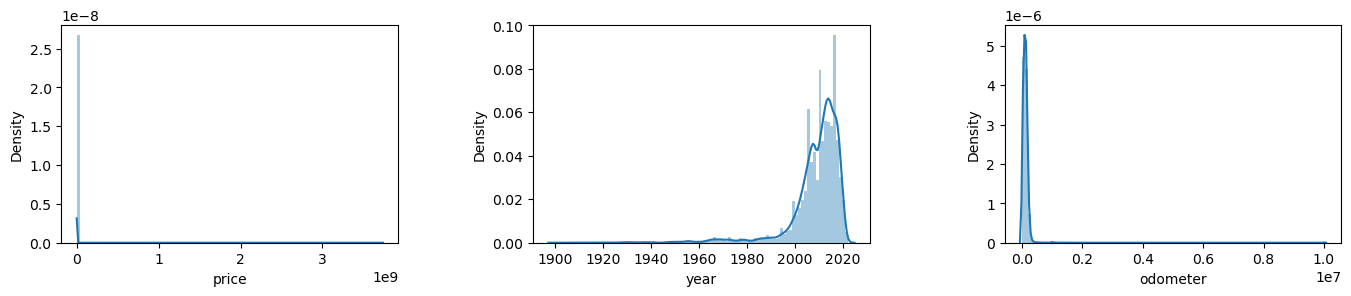

In [102]:
i=1
for x in cars.select_dtypes('number').columns:
    plt.subplot(5,3,i)
    sns.distplot(cars[x],bins=100)
    plt.subplots_adjust(left=0.0,bottom=0.0,right=2.0,top=3.0,wspace=0.4,hspace=0.4)
    i = i+1


both the Price and Odometer seems to have large value which are nonsensical > 3mil for price and 1 mil miles for odometer. remove the outliers 

In [103]:
cars["price"].agg(["min","mean","median","max","std","skew"]).to_frame().T


,min,mean,median,max,std,skew
price,0.0,116397.005318,9200.0,3.736929e+09,1.628056e+07,190.36428


In [104]:
cars = cars.drop(cars[cars['price'] <=0 ].index)
cars = cars.drop(cars[cars['price'] > 100000 ].index)
cars = cars.drop(cars[cars['odometer'] > 500000 ].index)
cars = cars.drop(cars[cars['odometer'] <=0 ].index)

/var/folders/fn/gqsn1b5x75x3nstgrhp06xtw0000gp/T/ipykernel_37918/4043227461.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars[x],bins=100)
/var/folders/fn/gqsn1b5x75x3nstgrhp06xtw0000gp/T/ipykernel_37918/4043227461.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars[x],bins=100)
/var

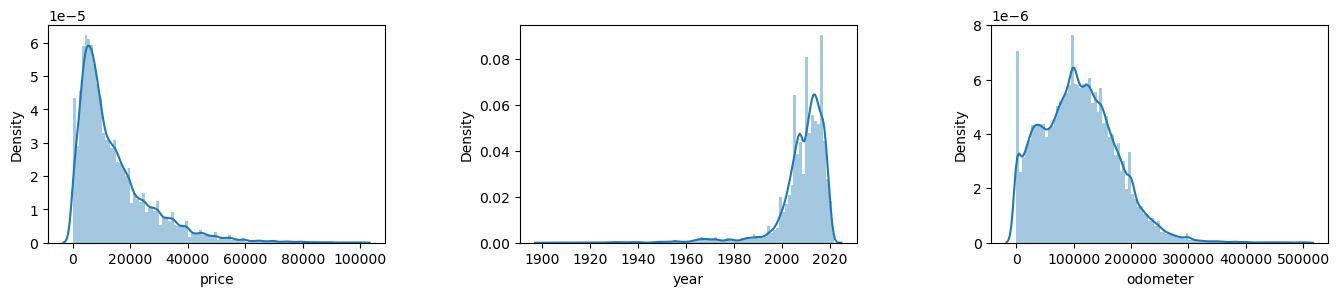

In [105]:
i=1
for x in cars.select_dtypes('number').columns:
    plt.subplot(5,3,i)
    sns.distplot(cars[x],bins=100)
    plt.subplots_adjust(left=0.0,bottom=0.0,right=2.0,top=3.0,wspace=0.4,hspace=0.4)
    i = i+1


## Missing values 
Next create a pandas dataframe to hold the missing value summary 

In [106]:
cars.isnull().sum()
na_cols=cars.columns[cars.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(cars[na_cols].isna().sum(), columns=['Number_missing'])

desc = pd.DataFrame(index = list(cars))
desc['count'] = cars.count()
desc['nunique'] = cars.nunique()
desc['%unique'] = desc['nunique'] / len(cars) * 100
desc['null'] = cars.isnull().sum()
desc['Percentage_missing']=np.round(100*mv['Number_missing']/len(cars),2)
desc['type'] = cars.dtypes
desc = pd.concat([desc, cars.describe().T.drop('count', axis = 1)], axis = 1)
desc

,count,nunique,%unique,null,Percentage_missing,type,mean,std,min,25%,50%,75%,max
region,219689,404,0.183896,0,NaN,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,219689,13181,5.999845,0,NaN,int64,14416.212423,13013.286913,1.0,5495.0,10000.0,19499.0,100000.0
year,219276,111,0.050526,413,0.19,float64,2008.564749,11.098077,1900.0,2006.0,2011.0,2015.0,2022.0
manufacturer,209413,42,0.019118,10276,4.68,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,216105,23841,10.852159,3584,1.63,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,134797,6,0.002731,84892,38.64,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,142904,8,0.003642,76785,34.95,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel,218748,5,0.002276,941,0.43,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,218033,79993,36.411928,1656,0.75,float64,109298.644971,65263.633533,1.0,60004.0,106000.0,150623.0,500000.0
title_status,217965,6,0.002731,1724,0.78,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Use imputation to fill missing values 

In [107]:
def impute(x):
    cars[x].fillna(cars[x].value_counts().index[0],inplace=True)
for x in desc.query('Percentage_missing < 50').index:
        impute(x)


In [108]:
cars.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

## EDA Exploratary Data Analysis 


In [109]:

cars.select_dtypes('number').corr()

,price,year,odometer
price,1.000000,0.243052,-0.431115
year,0.243052,1.000000,-0.154403
odometer,-0.431115,-0.154403,1.000000


Look at the distribution of numerical features using distplot

/var/folders/fn/gqsn1b5x75x3nstgrhp06xtw0000gp/T/ipykernel_37918/2796246848.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars[x])
/var/folders/fn/gqsn1b5x75x3nstgrhp06xtw0000gp/T/ipykernel_37918/2796246848.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars[x])
/var/folders/fn/gqsn1b

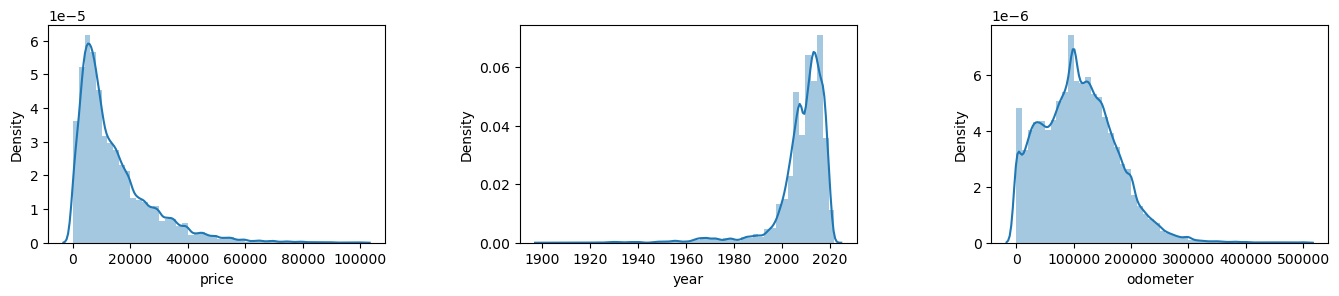

In [110]:
i=1
for x in cars.select_dtypes('number').columns:
  
    plt.subplot(5,3,i)
    sns.distplot(cars[x])
    plt.subplots_adjust(left=0.0,bottom=0.0,right=2.0,top=3.0,wspace=0.4,hspace=0.4)
    i = i+1


compare the different categorical features by using boxplot with price as y axis

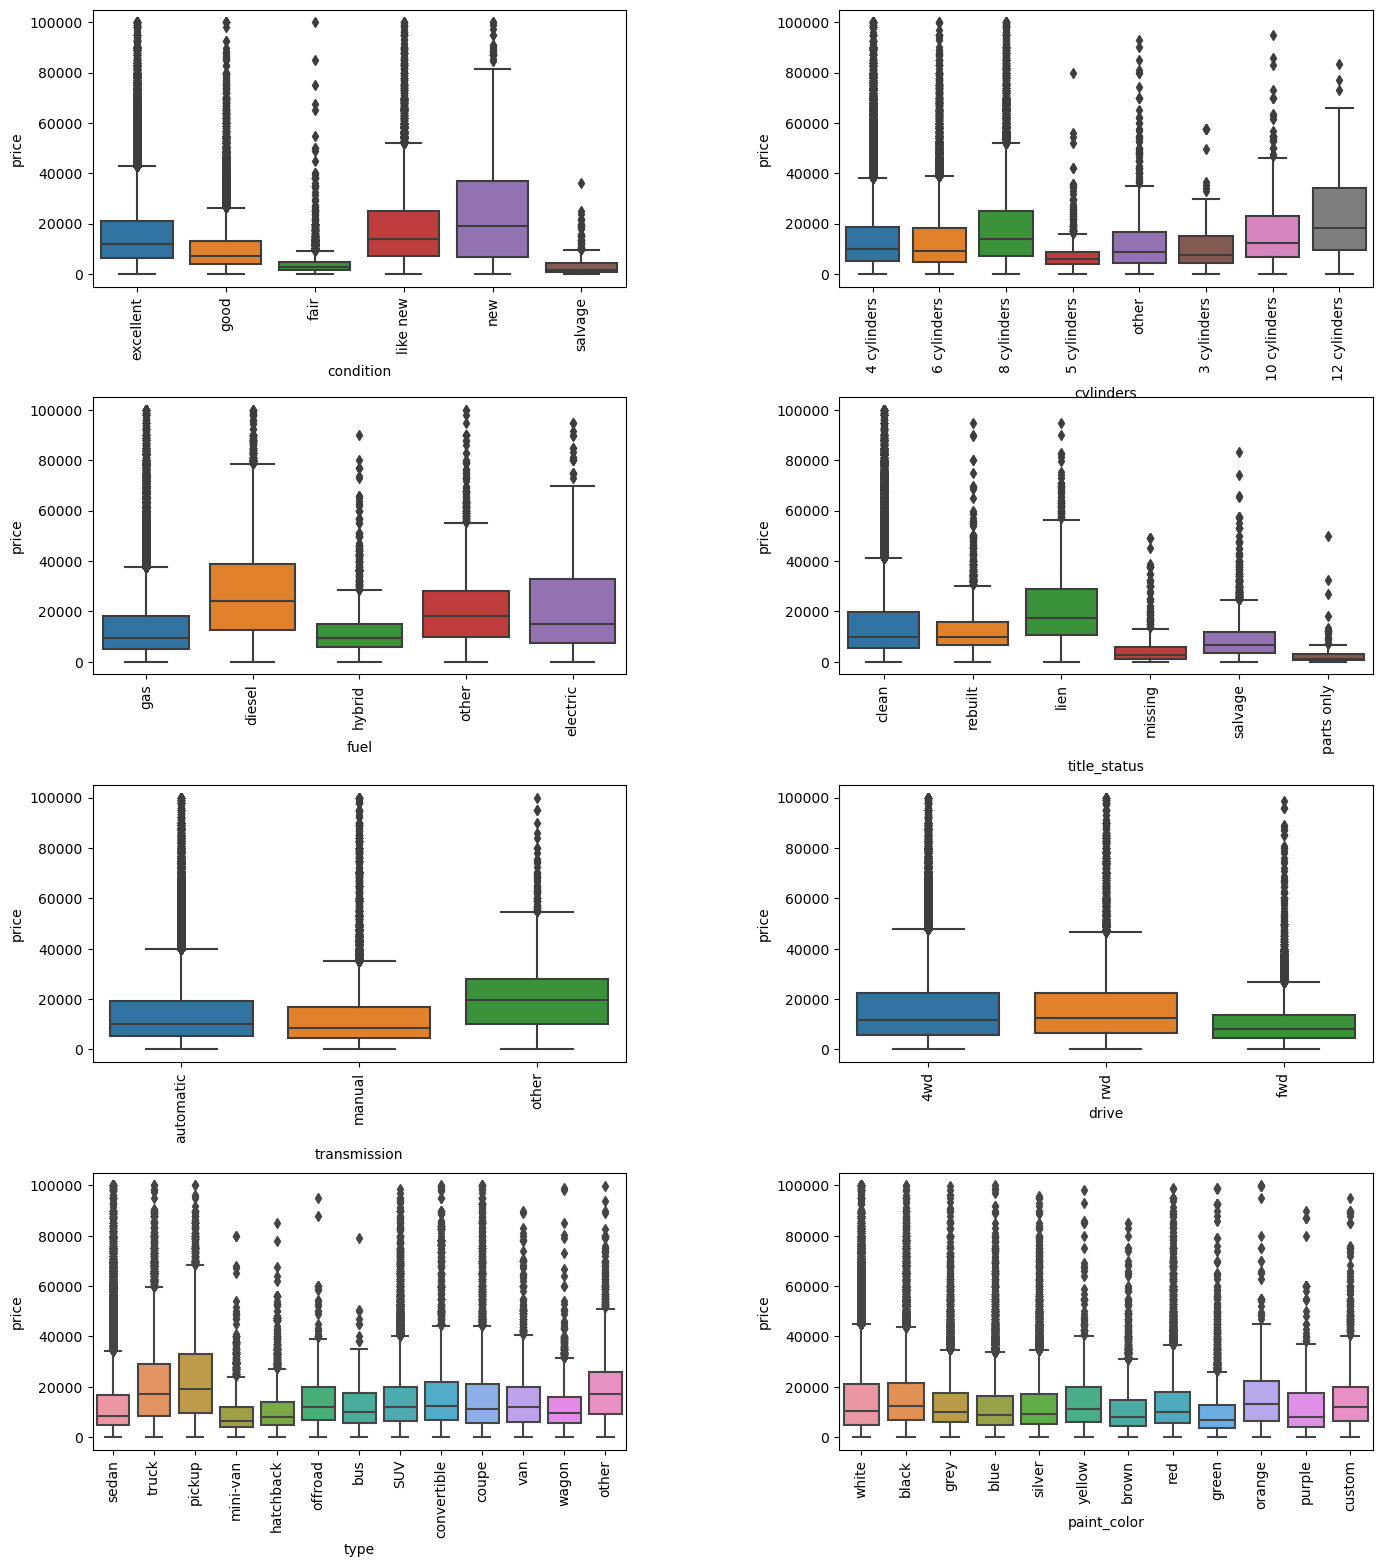

In [111]:
i=1
for x in desc.query('nunique < 14').index:
    plt.subplot(4,2,i)
    sns.boxplot(data=cars,x=x,y='price')
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=0.0,bottom=0.0,right=2.0,top=3.0,wspace=0.4,hspace=0.4)
    i = i+1

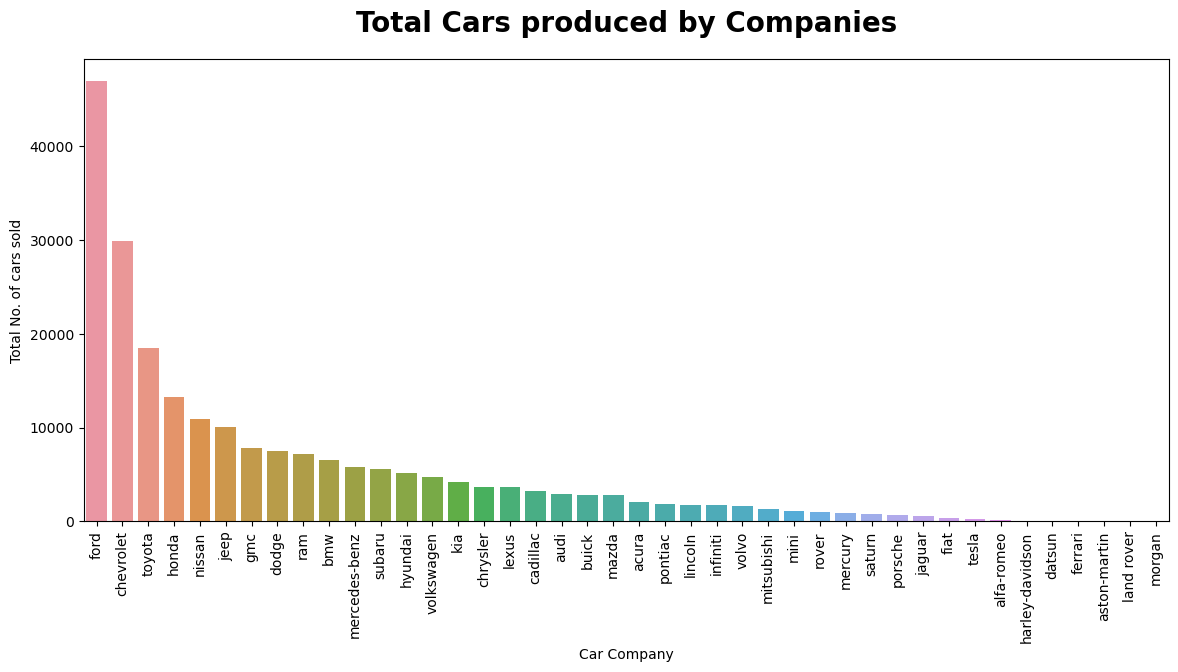

In [112]:
plt.figure(figsize=(14,6))
counts = cars["manufacturer"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Car Company")
plt.ylabel("Total No. of cars sold")
plt.title("Total Cars produced by Companies", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90)
plt.show()

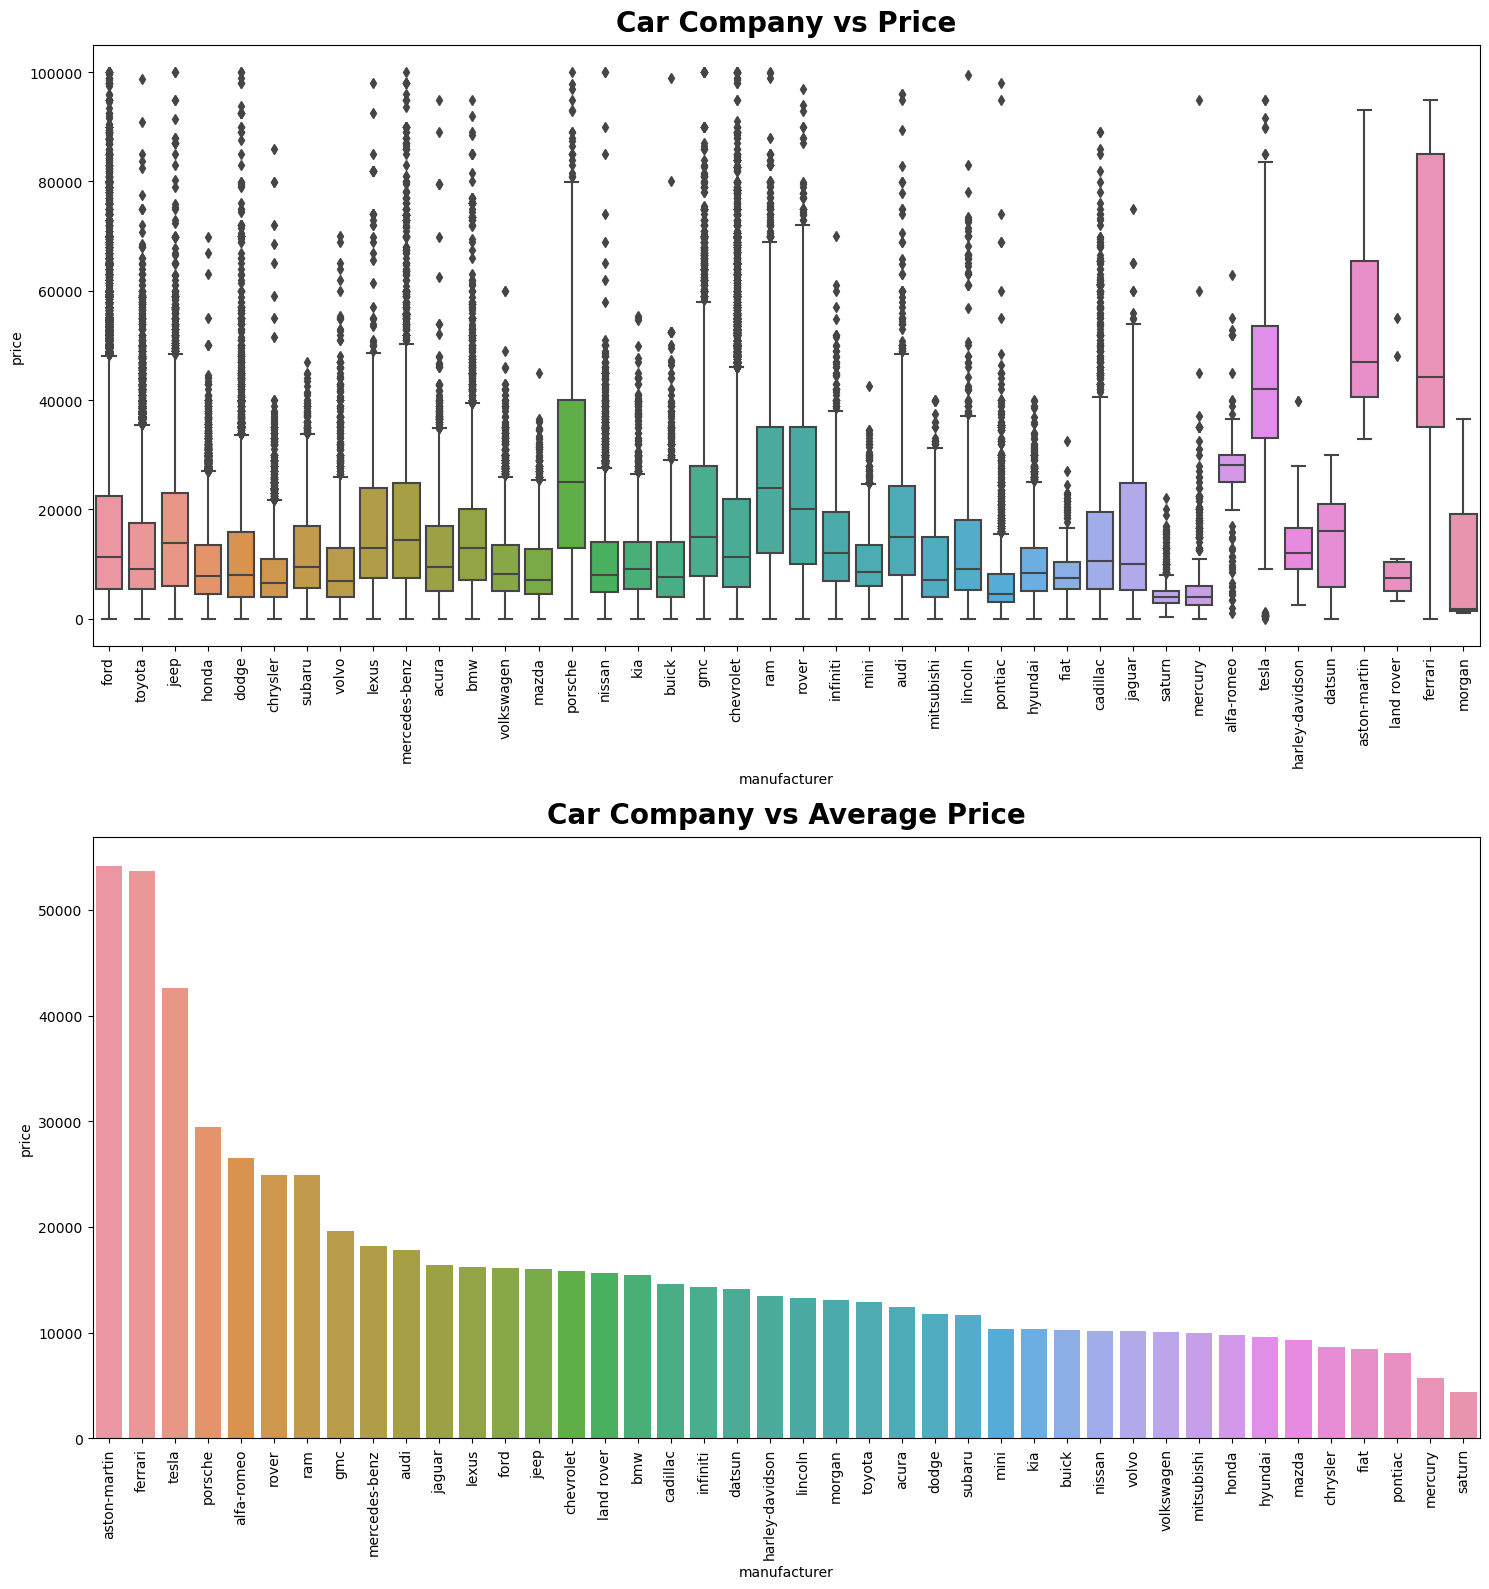

In [113]:
plt.figure(figsize=(15,16))

plt.subplot(2,1,1)
sns.boxplot(x="manufacturer",y="price",data=cars)
plt.xticks(rotation=90)
plt.title("Car Company vs Price", pad=10, fontweight="black", fontsize=20)

plt.subplot(2,1,2)
x = pd.DataFrame(cars.groupby("manufacturer")["price"].mean().sort_values(ascending=False))
sns.barplot(x=x.index,y="price",data=x) 
plt.xticks(rotation=90)
plt.title("Car Company vs Average Price", pad=10, fontweight="black", fontsize=20)
plt.tight_layout()
plt.show()

<Axes: >

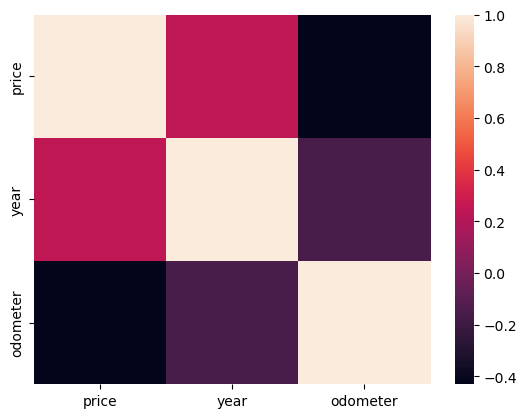

In [114]:
sns.heatmap(cars.select_dtypes('number').corr())

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Apply column transformer for Ordinal and category columns

In [115]:
#use label encoder for columns model, region,manufacturer and state
def labelenc(x):
  lab_en = LabelEncoder()
  cars.loc[:,x] = lab_en.fit_transform(cars.loc[:,x])
for x in ['model', 'region','manufacturer' ,'state']:
  labelenc(x)

create train and test dataset

In [116]:
X = cars.drop(['price'],axis=1)
Y= cars['price']
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=42,test_size=0.3)

In [117]:
#Define categories to be ordinally encoded:
oe_columns = ['condition','cylinders']

#Define categories to be one hot encoded:
ohe_columns = ['fuel','title_status','transmission','drive','type','paint_color']


#Define remaining numeric columns:
numeric_columns = ['odometer','year']

#Create column transformer:
col_transformer = make_column_transformer((OneHotEncoder(sparse = False, drop='first',handle_unknown='ignore'), ohe_columns),
                                          (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), oe_columns),
                                          (StandardScaler(), numeric_columns),
                                          remainder = 'passthrough')

# Linear Regression with Sequential Feature Selector

In [118]:
#Create pipeline to transform data and train model using SFS
sequential_pipe = Pipeline([('col_transformer', col_transformer),('scaler',StandardScaler()),('selector',SequentialFeatureSelector(estimator= LinearRegression())),('linreg',LinearRegression())])
sequential_pipe

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['fuel', 'title_status',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['condition', 'cylinders']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['odometer', 'year'])])),
                ('scaler', StandardScaler()),
                ('selector',
                 SequentialFeatureSelector(estimator=LinearRegression())),
                ('linreg', LinearRegression())])

In [119]:
#Define parameters for Grid Search
params = {'selector__n_features_to_select':[3,4,5]}

#Define Grid
grid = GridSearchCV(estimator = sequential_pipe,
                       param_grid = params)
grid.fit(X_train,y_train)
#Select best estimator to make predictions
sel_best = grid.best_estimator_

sequential_train_mse = mean_squared_error(y_train,sel_best.predict(X_train))
sequential_test_mse = mean_squared_error(y_test,sel_best.predict(X_test))

/Users/kanantharaman/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/kanantharaman/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/kanantharaman/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/kanantharaman/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was re

In [120]:
#get best features out and the coeff
f=sel_best.named_steps['selector'].get_feature_names_out()
df=pd.DataFrame(sel_best.named_steps['col_transformer'].get_feature_names_out(),sel_best[-3].get_feature_names_out())
best=df.loc[f]
best['coef'] = sel_best.named_steps['linreg'].coef_
best

,0,coef
x1,onehotencoder__fuel_gas,-3198.154124
x11,onehotencoder__drive_fwd,-2745.402955
x37,ordinalencoder__cylinders,1661.845375
x38,standardscaler__odometer,-5697.392879
x39,standardscaler__year,2810.659954


In [121]:
#calculate MAE and R2
sequential_train_mae = mean_absolute_error(y_train,sel_best.predict(X_train))
sequential_test_mae = mean_absolute_error(y_test,sel_best.predict(X_test))
sequential_train_r2 = r2_score(y_train,sel_best.predict(X_train))
sequential_test_r2 = r2_score(y_test,sel_best.predict(X_test))


In [122]:
#print train and test mse 
result = pd.DataFrame(data=[['Linear Regression SFS',sequential_test_mse,sequential_train_mse,sequential_train_mae,sequential_test_mae,sequential_train_r2,sequential_test_r2]]
                      ,columns=['model','Train MSE','Test MSE','Train MAE','Test MAE','Train R2','Test R2'])
result

,model,Train MSE,Test MSE,Train MAE,Test MAE,Train R2,Test R2
0,Linear Regression SFS,1.086918e+08,1.099950e+08,7188.571142,7157.551638,0.353686,0.3506


In [123]:
#Create pipeline to transform data and train model using RFE
rfe_pipe1 = Pipeline([('col_transformer', col_transformer),('scaler',StandardScaler()),('selector',RFE(estimator= Lasso())),('linreg',LinearRegression())])
rfe_pipe1.fit(X_train,y_train)
#Define parameters for Grid Search
params = {'selector__n_features_to_select':[3,4,5]}

#Define Grid
rfe_grid = GridSearchCV(estimator = rfe_pipe1,
                       param_grid = params)
rfe_grid.fit(X_train,y_train)
#Select best estimator to make predictions
rfe_sel_best = rfe_grid.best_estimator_
rfe_train_mse1 = mean_squared_error(y_train,rfe_sel_best.predict(X_train))
rfe_test_mse1 = mean_squared_error(y_test,rfe_sel_best.predict(X_test))

/Users/kanantharaman/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/kanantharaman/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/kanantharaman/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/kanantharaman/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was re

In [124]:
f=rfe_sel_best.named_steps['selector'].get_feature_names_out()
df=pd.DataFrame(rfe_sel_best.named_steps['col_transformer'].get_feature_names_out(),rfe_sel_best[-3].get_feature_names_out())
best_rfe=df.loc[f]
best_rfe['coef'] = rfe_sel_best.named_steps['linreg'].coef_
best_rfe

,0,coef
x1,onehotencoder__fuel_gas,-3804.411456
x3,onehotencoder__fuel_other,-1370.029861
x11,onehotencoder__drive_fwd,-2989.640560
x38,standardscaler__odometer,-5686.385074
x39,standardscaler__year,2575.365547


In [125]:
#calculate MAE and R2
rfe_train_mae1 = mean_absolute_error(y_train,rfe_sel_best.predict(X_train))
rfe_test_mae1 = mean_absolute_error(y_test,rfe_sel_best.predict(X_test))
rfe_train_r2 = r2_score(y_train,rfe_sel_best.predict(X_train))
rfe_test_r2 = r2_score(y_test,rfe_sel_best.predict(X_test))

In [126]:
#add mse to results dataframe
rfe_result = pd.DataFrame([{'model':'LinearRegression RFE','Train MSE':rfe_train_mse1,'Test MSE':rfe_test_mse1
                            ,'Train MAE':rfe_train_mae1,'Test MAE':rfe_test_mae1
                            ,'Train R2':rfe_train_r2,'Test R2':rfe_test_r2}])
result = pd.concat([result,rfe_result])

In [127]:
result

,model,Train MSE,Test MSE,Train MAE,Test MAE,Train R2,Test R2
0,Linear Regression SFS,1.086918e+08,1.099950e+08,7188.571142,7157.551638,0.353686,0.350600
0,LinearRegression RFE,1.110844e+08,1.093118e+08,7285.876492,7244.941754,0.347285,0.346895


In [128]:
#Create pipeline to transform data and train model using lasso
l_pipe = Pipeline([('col_transformer', col_transformer),('scaler',StandardScaler()),('lasso',Lasso(random_state = 42))])
l_pipe.fit(X_train,y_train)
l_pipe.get_params()
pipe_params = {'lasso__alpha':[0.001, 0.01, 0.1, 0, 1, 10]}
lasso_pipe = GridSearchCV(estimator=l_pipe, param_grid=pipe_params, cv=5, verbose=0)
lasso_pipe.fit(X_train, y_train)


/Users/kanantharaman/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/kanantharaman/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/kanantharaman/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/kanantharaman/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was re

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['fuel',
                                                                          'title_status',
                                                                          'transmission',
                                                                          'drive',
                                                                          'type',
                                                                          'paint_color']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['condition',
                                                                          'cylinders']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['odometer',
                                                                          'year'])])),
                                       ('scaler', StandardScaler()),
                                       ('lasso', Lasso(random_state=42))]),
             param_grid={'lasso__alpha': [0.001, 0.01, 0.1, 0, 1, 10]})

In [129]:
df=pd.DataFrame(lasso_pipe.best_estimator_.named_steps['col_transformer'].get_feature_names_out(),lasso_pipe.best_estimator_.named_steps.lasso.coef_).sort_index(ascending=False)
df

,0
2786.369612,standardscaler__year
1418.333193,onehotencoder__type_pickup
943.269614,onehotencoder__type_truck
937.826536,ordinalencoder__cylinders
426.032560,onehotencoder__type_convertible
403.626091,onehotencoder__type_coupe
332.391114,remainder__model
271.136441,onehotencoder__transmission_manual
221.318541,onehotencoder__title_status_lien
156.170028,onehotencoder__type_other


In [130]:
lasso_pipe.best_params_

{'lasso__alpha': 0.1}

In [131]:
train_mse=mean_squared_error(y_train,lasso_pipe.best_estimator_.predict(X_train))
test_mse=mean_squared_error(y_test,lasso_pipe.best_estimator_.predict(X_test))
train_mae=mean_absolute_error(y_train,lasso_pipe.best_estimator_.predict(X_train))
test_mae=mean_absolute_error(y_test,lasso_pipe.best_estimator_.predict(X_test))
train_r2=r2_score(y_train,lasso_pipe.best_estimator_.predict(X_train))
test_r2=r2_score(y_test,lasso_pipe.best_estimator_.predict(X_test))

train_mse,test_mse

(100315620.02585904, 98583291.48655011)

In [132]:
#add mse to results dataframe
lasso_result = pd.DataFrame([{'model':'LassoRegression','Train MSE':train_mse,'Test MSE':test_mse
                              ,'Train MAE':train_mae,'Test MAE':test_mae
                              ,'Train R2':train_r2,'Test R2':test_r2}])
result = pd.concat([result,lasso_result])
result

,model,Train MSE,Test MSE,Train MAE,Test MAE,Train R2,Test R2
0,Linear Regression SFS,1.086918e+08,1.099950e+08,7188.571142,7157.551638,0.353686,0.350600
0,LinearRegression RFE,1.110844e+08,1.093118e+08,7285.876492,7244.941754,0.347285,0.346895
0,LassoRegression,1.003156e+08,9.858329e+07,6754.279606,6708.577262,0.410561,0.410995


In [133]:
#Create pipeline to transform data and train model using Ridge
r_pipe = Pipeline([('col_transformer', col_transformer),('scaler',StandardScaler()),('ridge',Ridge())])
r_pipe.fit(X_train,y_train)
pipe_params = {'ridge__alpha':[0.001, 0.01, 0.1, 0, 1, 10]}
ridge_pipe = GridSearchCV(estimator=r_pipe, param_grid=pipe_params, cv=5, verbose=0)
ridge_pipe.fit(X_train, y_train)


/Users/kanantharaman/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/kanantharaman/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/kanantharaman/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/kanantharaman/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was re

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['fuel',
                                                                          'title_status',
                                                                          'transmission',
                                                                          'drive',
                                                                          'type',
                                                                          'paint_color']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['condition',
                                                                          'cylinders']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['odometer',
                                                                          'year'])])),
                                       ('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.001, 0.01, 0.1, 0, 1, 10]})

In [134]:
df=pd.DataFrame(ridge_pipe.best_estimator_.named_steps['col_transformer'].get_feature_names_out(),ridge_pipe.best_estimator_.named_steps.ridge.coef_).sort_index(ascending=False)
df

,0
2786.273875,standardscaler__year
1418.390951,onehotencoder__type_pickup
943.383565,onehotencoder__type_truck
937.841735,ordinalencoder__cylinders
426.148246,onehotencoder__type_convertible
403.736797,onehotencoder__type_coupe
332.442926,remainder__model
271.212402,onehotencoder__transmission_manual
221.416061,onehotencoder__title_status_lien
156.269475,onehotencoder__type_other


In [135]:
ridge_pipe.best_params_

{'ridge__alpha': 10}

In [136]:
ridge_train_mse=mean_squared_error(y_train,ridge_pipe.best_estimator_.predict(X_train))
ridge_test_mse=mean_squared_error(y_test,ridge_pipe.best_estimator_.predict(X_test))
ridge_train_mae=mean_absolute_error(y_train,ridge_pipe.best_estimator_.predict(X_train))
ridge_test_mae=mean_absolute_error(y_test,ridge_pipe.best_estimator_.predict(X_test))
ridge_train_r2=r2_score(y_train,ridge_pipe.best_estimator_.predict(X_train))
ridge_test_r2=r2_score(y_test,ridge_pipe.best_estimator_.predict(X_test))
ridge_train_mse,ridge_test_mse

(100315619.7855642, 98583180.7257159)

In [137]:
#add mse to results dataframe
lridge_result = pd.DataFrame([{'model':'RidgeRegression','Train MSE':ridge_train_mse,'Test MSE':ridge_test_mse
                               ,'Train MAE':ridge_train_mae,'Test MAE':ridge_test_mae
                              ,'Train R2':ridge_train_r2,'Test R2':ridge_test_r2}])
result = pd.concat([result,lridge_result])
result.drop_duplicates()

,model,Train MSE,Test MSE,Train MAE,Test MAE,Train R2,Test R2
0,Linear Regression SFS,1.086918e+08,1.099950e+08,7188.571142,7157.551638,0.353686,0.350600
0,LinearRegression RFE,1.110844e+08,1.093118e+08,7285.876492,7244.941754,0.347285,0.346895
0,LassoRegression,1.003156e+08,9.858329e+07,6754.279606,6708.577262,0.410561,0.410995
0,RidgeRegression,1.003156e+08,9.858318e+07,6754.286451,6708.576334,0.410561,0.410996


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.


After conducting some modeling, our objective is to assess what constitutes a high-quality model and extract valuable insights from our findings. It's imperative to revisit our business objectives and evaluate how effectively we can offer meaningful insights regarding the determinants of used car prices. The current goal is to summarize our findings and decide whether previous phases require reevaluation and adjustment or if there is valuable information to present to our client.

Our best model is selected based on the  lowest MSE ,MAE and best r2 score. based on the summary above the Lasso and Ridge performend better than the Linear model 
SFS and RFE. Lasso and Ridge had the almost same MSE.Now lets use permutation feature importance to identify the imprortance of feature_selection

In [ ]:
importance = permutation_importance(ridge_pipe.best_estimator_, X_test, y_test, n_repeats=30, random_state=42)

In [ ]:
pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': importance.importances_mean,
    'Std Deviation': importance.importances_std
}).sort_values('Importance',ascending=False)


,Feature,Importance,Std Deviation
7,odometer,0.386965,0.002227
6,fuel,0.144727,0.001130
1,year,0.101103,0.000903
11,type,0.077205,0.000722
5,cylinders,0.032314,0.000570
10,drive,0.032200,0.000554
8,title_status,0.007431,0.000194
12,paint_color,0.002486,0.000152
4,condition,0.001640,0.000106
9,transmission,0.001350,0.000135


As can be seen from above permutation importance table the top 4 important features to determine car price is odometer,fuel,year and type.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Based on the detailed investigation of the provided used car dataset . Below are the findings
odometer - lower the mileage run on the car higher the price
Year - Recent the make of the car better the price
fuel - Gas/electric car are the most in demand hence higher price
type  - SUV and Pick up truck are premium priced 

Based on the analysis, it's evident that odometer reading, year of manufacture, condition, and fuel type are the most influential factors. The model ought to offer precise recommendations regarding which cars consumers are likely to value more than others.